In [1]:
from jax import random
from datasets.mnist import MNISTDataset
from src.autoencoders.simple_vae import model
from src.utils.autoencoder_trainer import AutoencoderTrainer
from src.utils.autoencoder_manager import get_latent_dataset, restore_model_state
import tensorflow_datasets as tfds

In [2]:
rng = random.PRNGKey(0)
binary_vae = model(latents=20)
input_shape = (64, 196)
learning_rate = 3e-4

# Load MNIST dataset for training and testing
train_dataset = MNISTDataset(split='train', batch_size=64, image_size=(14, 14)).load()
test_dataset = MNISTDataset(split='test', batch_size=64, image_size=(14, 14)).load()

# Create an instance of the trainer with your binary VAE model
trainer = AutoencoderTrainer(binary_vae, learning_rate, rng, input_shape)
state = trainer.state
params = trainer.params

In [3]:
ckpt_dir = "weights/binary_vae_500epoch_3e-4lr/checkpoint_461"
state = restore_model_state(ckpt_dir, state)

print("Weights loaded successfully.")

Checkpoint restored from directory '/Users/uribagi/Documents/GitHub/Latent-IQP/weights/binary_vae_500epoch_3e-4lr/checkpoint_461'.
Weights loaded successfully.


/Users/uribagi/Documents/GitHub/Latent-IQP/.venv/lib/python3.12/site-packages/orbax/checkpoint/_src/serialization/type_handlers.py:1250: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


In [4]:
from datasets.latent_mnist import LatentDataset

In [5]:
# Example of loading a saved dataset
latent_file = './datasets/mnist_latent_train.npy'
label_file = './datasets/mnist_labels_train.npy'
dataset = LatentDataset(latent_file, label_file, batch_size=8)

In [6]:
ds = dataset.load()

In [7]:
print(ds.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 20), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [8]:
for d in ds:
    print(d)
    break

(<tf.Tensor: shape=(8, 20), dtype=int64, numpy=
array([[0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]])>, <tf.Tensor: shape=(8,), dtype=int64, numpy=array([9, 2, 4, 9, 7, 8, 5, 7])>)


In [9]:
from src.utils.autoencoder_manager import reconstruct

In [10]:
d = ds.take(1)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

tf.Tensor([1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1], shape=(20,), dtype=int64)
reconstructing only based on  tf.Tensor([1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1], shape=(20,), dtype=int64)
(196,)
(14, 14)


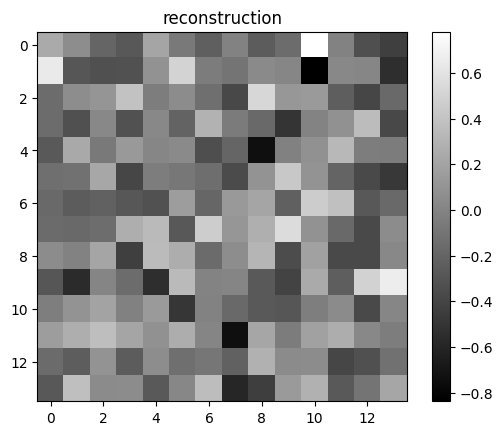

In [12]:
for i in d:
    print(i[0][0])
    rec = reconstruct(binary_vae, params, i[0][0])
    print(rec.shape)
    rec = rec.reshape(14,14)
    print(rec.shape)
    # Plotting the matrix
    plt.imshow(rec, cmap='gray', interpolation='nearest')
    plt.colorbar()  # Add color bar to the side
    plt.title('reconstruction')
    plt.show()
    break